# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from set_extraction_monks import x_train_m1, y_train_m1, x_test_m1, y_test_m1, x_train_m2, y_train_m2, x_test_m2, y_test_m2, x_train_m3, y_train_m3, x_test_m3, y_test_m3

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, data_5 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   124 non-null    int64
 1   a1      124 non-null    int64
 2   a2      124 non-null    int64
 3   a3      124 non-null    int64
 4   a4      124 non-null    int64
 5   a5      124 non-null    int64
 6   a6      124 non-null    int64
dtypes: int64(7)
memory usage: 7.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, data_1 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   432 non-null    int64
 1   a1      432 non-null    int64
 2   a2      432 non-null    int64
 3   a3      432 non-null    int64
 4   a4      432 non-null    int64
 5   a5      432 non-null    int64
 6   a6      432 non-null    int64
dtypes: int64(7)
memory usage: 27.0+ KB
Shapes before encoding:
x_train_m1 (124, 6)
y_train_m1 (124,)
x_test_m1 (

# Models

In [3]:
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
results = []

# TREE

## DecisionTreeClassifier monk-1

### Grid search for parameter setting 


In [6]:
params = { 
     'criterion': ['gini', 'entropy', 'log_loss'],
     #'splitter' : ['best', 'random'],
     'max_depth': [None, 5, 10, 20, 30, 40, 50], #40, 50, 100],
     'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
     'min_samples_leaf': [1, 5, 10, 20, 30], 
     'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001],
     #'max_features':['auto', 'sqrt', 'log2'],
     'ccp_alpha': [0.0, 0.1, 0.01], 
     'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 80],
     'class_weight': [None, 'balanced'] 
}

In [7]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
dt_search = DecisionTreeClassifier()
#kfold = KFold(n_splits=5)

dt_cv_m1 = GridSearchCV(estimator=dt_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
dt_cv_m1.fit(x_train_m1, y_train_m1)

Fitting 5 folds for each of 123480 candidates, totalling 617400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 30, 40, 50],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 80],
                         'min_samples_leaf': [1, 5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=4)

In [8]:
dt_cv_m1.best_params_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01}

In [9]:
# validation
dt_cv_m1.best_score_

0.8949999999999999

In [10]:
# save the model to disk
joblib.dump(dt_cv_m1.best_estimator_, 'monk_models/dt_m1.z')

['monk_models/dt_m1.z']

### Validation plot

In [11]:
from sklearn.model_selection import validation_curve

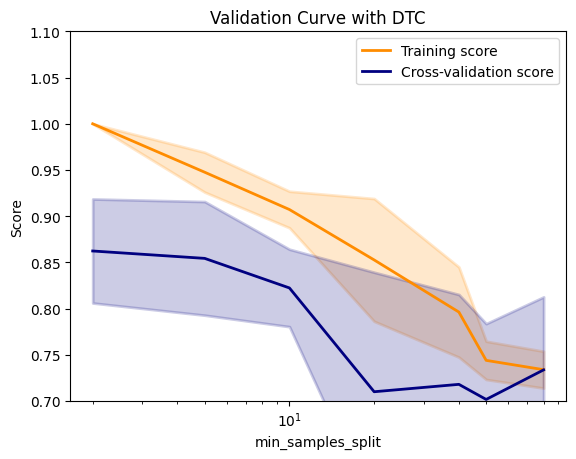

In [12]:
param_range =  [2, 5, 10, 20, 40, 50, 80]
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(ccp_alpha=0.0,
                            class_weight=None,
                            criterion='gini',
                            max_depth=10,
                            max_leaf_nodes=30,
                            min_samples_leaf=1,
                            #min_samples_split=2,
                            min_weight_fraction_leaf=0.0),
                            #splitter='best'),
    x_train_m1,
    y_train_m1,
    param_name="min_samples_split",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DTC")
plt.xlabel("min_samples_split")
plt.ylabel("Score")

plt.ylim(0.7, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [13]:
dt = joblib.load('monk_models/dt_m1.z')

In [14]:
dt

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30,
                       min_weight_fraction_leaf=0.01)

In [15]:
train_pred_dt = dt.predict(x_train_m1)

In [16]:
print('Accuracy train set')
print(classification_report(y_train_m1, train_pred_dt))

Accuracy train set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.98      0.95      0.97        62

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124



In [17]:
test_pred_dt = dt.predict(x_test_m1)

In [18]:
print('Accuarcy test set')
print(classification_report(y_test_m1, test_pred_dt))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       216
           1       0.90      0.90      0.90       216

    accuracy                           0.90       432
   macro avg       0.90      0.90      0.90       432
weighted avg       0.90      0.90      0.90       432



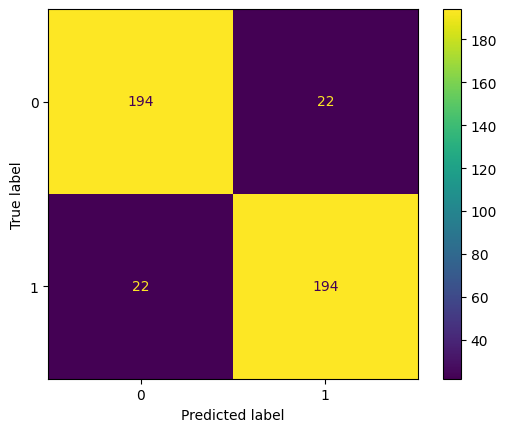

In [19]:
plot_confusion_matrix(dt, x_test_m1, y_test_m1)
plt.show() 

In [20]:
results.append(('DecisionTreeClassifier monk-1 train', accuracy_score(y_train_m1, train_pred_dt)))
results.append(('DecisionTreeClassifier monk-1 validation', dt_cv_m1.best_score_))
results.append(('DecisionTreeClassifier monk-1 test', accuracy_score(y_test_m1, test_pred_dt)))

## DecisionTreeClassifier monk-2

### Grid search for parameter setting 


In [21]:
params = { 
     'criterion': ['gini', 'entropy', 'log_loss'],
     #'splitter' : ['best', 'random'],
     'max_depth': [None, 30, 40, 50, 80, 100], #40, 50, 100], 10, 20,
     'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
     'min_samples_leaf': [1, 5, 10, 30, 50, 80], #30], 
     'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001],
     #'max_features':['auto', 'sqrt', 'log2'],
     'ccp_alpha': [0.0, 0.1, 0.01, 0.001], 
     'max_leaf_nodes': [None, 5, 10, 20, 40, 70, 100], #80],
     'class_weight': [None, 'balanced'] 
}

In [22]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
dt_search = DecisionTreeClassifier()
#kfold = KFold(n_splits=5)

dt_cv_m2 = GridSearchCV(estimator=dt_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
dt_cv_m2.fit(x_train_m2, y_train_m2)

Fitting 5 folds for each of 169344 candidates, totalling 846720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01, 0.001],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 40, 50, 80, 100],
                         'max_leaf_nodes': [None, 5, 10, 20, 40, 70, 100],
                         'min_samples_leaf': [1, 5, 10, 30, 50, 80],
                         'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=4)

In [23]:
dt_cv_m2.best_params_

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 100,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [24]:
# validation
dt_cv_m2.best_score_

0.6873440285204991

In [25]:
# save the model to disk
joblib.dump(dt_cv_m2.best_estimator_, 'monk_models/dt_m2.z')

['monk_models/dt_m2.z']

### Validation plot

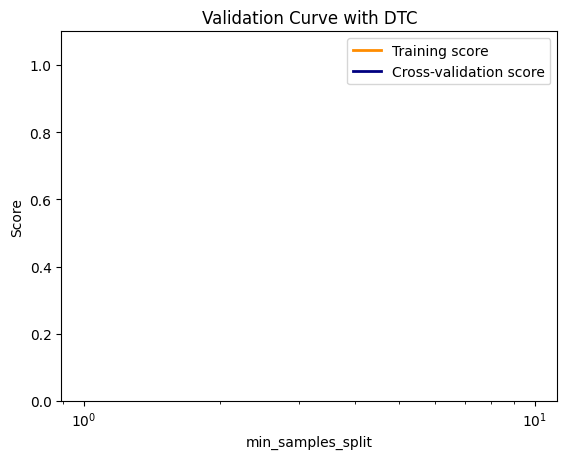

In [26]:
param_range =  [2, 5, 10, 20, 40, 50, 80]

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(ccp_alpha=0.01,
                            class_weight=None,
                            criterion='log_loss',
                            max_depth=40,
                            max_leaf_nodes=None,
                            min_samples_leaf=1,
                            #min_samples_split=2,
                            min_weight_fraction_leaf=0.001),
                            #splitter='best'),
    x_train_m2,
    y_train_m2,
    param_name="min_samples_split",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DTC")
plt.xlabel("min_samples_split")
plt.ylabel("Score")

plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [27]:
dt = joblib.load('monk_models/dt_m2.z')

In [28]:
dt

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=100,
                       max_leaf_nodes=100)

In [29]:
train_pred_dt = dt.predict(x_train_m2)

In [30]:
print('Accuracy train set')
print(classification_report(y_train_m2, train_pred_dt))

Accuracy train set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.98      0.99        64

    accuracy                           0.99       169
   macro avg       1.00      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



In [31]:
test_pred_dt = dt.predict(x_test_m2)

In [32]:
print('Accuarcy test set')
print(classification_report(y_test_m2, test_pred_dt))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.93      0.87      0.89       290
           1       0.76      0.86      0.81       142

    accuracy                           0.86       432
   macro avg       0.84      0.86      0.85       432
weighted avg       0.87      0.86      0.87       432



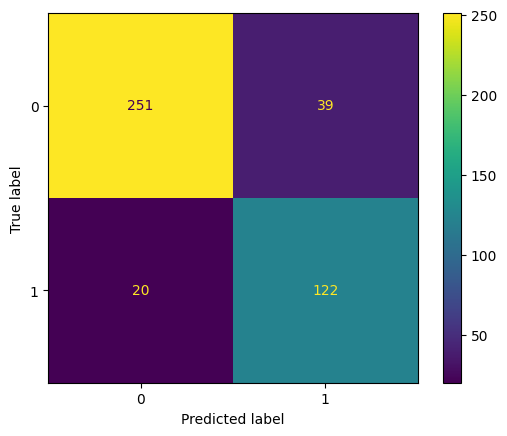

In [33]:
plot_confusion_matrix(dt, x_test_m2, y_test_m2)
plt.show() 

In [34]:
results.append(('DecisionTreeClassifier monk-2 train', accuracy_score(y_train_m2, train_pred_dt)))
results.append(('DecisionTreeClassifier monk-2 validation', dt_cv_m2.best_score_))
results.append(('DecisionTreeClassifier monk-2 test', accuracy_score(y_test_m2, test_pred_dt)))

## DecisionTreeClassifier monk-3

### Grid search for parameter setting 


In [35]:
params = { 
     'criterion': ['gini', 'entropy', 'log_loss'],
     #'splitter' : ['best', 'random'],
     'max_depth': [None, 5, 10, 20, 30, 40, 50], #40, 50, 100],
     'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
     'min_samples_leaf': [1, 5, 10, 20, 30], 
     'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001],
     #'max_features':['auto', 'sqrt', 'log2'],
     'ccp_alpha': [0.0, 0.1, 0.01], 
     'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 80],
     'class_weight': [None, 'balanced'] 
}

In [36]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
dt_search = DecisionTreeClassifier()

dt_cv_m3 = GridSearchCV(estimator=dt_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
dt_cv_m3.fit(x_train_m3, y_train_m3)

Fitting 5 folds for each of 123480 candidates, totalling 617400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 30, 40, 50],
                         'max_leaf_nodes': [None, 5, 10, 20, 30, 40, 80],
                         'min_samples_leaf': [1, 5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20, 40, 50, 80],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=4)

In [37]:
dt_cv_m3.best_params_

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.001}

In [38]:
# validation
dt_cv_m3.best_score_

0.9426666666666665

In [39]:
# save the model to disk
joblib.dump(dt_cv_m3.best_estimator_, 'monk_models/dt_m3.z')

['monk_models/dt_m3.z']

### Validation plot

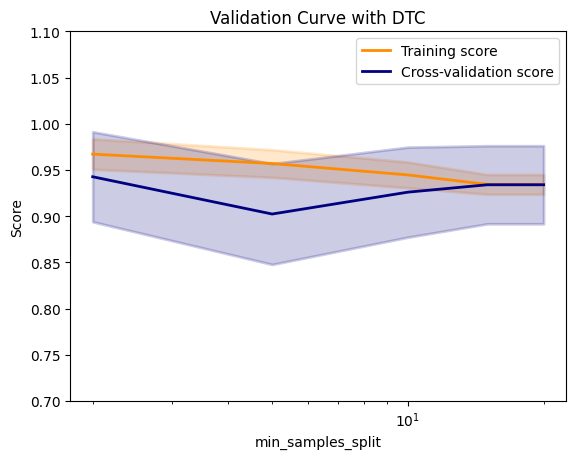

In [40]:
param_range =  [2, 5, 10, 15, 20]

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(ccp_alpha=0.0,
                           class_weight='balanced',
                           criterion='entropy',
                           max_depth=50,
                           max_leaf_nodes=10,
                           min_samples_leaf=1,
                           #min_samples_split=2,
                           min_weight_fraction_leaf=0.0),
                           #splitter='best'),
    x_train_m3,
    y_train_m3,
    param_name="min_samples_split",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DTC")
plt.xlabel("min_samples_split")
plt.ylabel("Score")

plt.ylim(0.7, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [41]:
dt = joblib.load('monk_models/dt_m3.z')

In [42]:
dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=10,
                       min_weight_fraction_leaf=0.001)

In [43]:
train_pred_dt = dt.predict(x_train_m3)

In [44]:
print('Accuracy train set')
print(classification_report(y_train_m3, train_pred_dt))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        62
           1       0.92      1.00      0.96        60

    accuracy                           0.96       122
   macro avg       0.96      0.96      0.96       122
weighted avg       0.96      0.96      0.96       122



In [45]:
test_pred_dt = dt.predict(x_test_m3)

In [46]:
print('Accuarcy test set')
print(classification_report(y_test_m3, test_pred_dt))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       204
           1       0.95      0.96      0.96       228

    accuracy                           0.95       432
   macro avg       0.95      0.95      0.95       432
weighted avg       0.95      0.95      0.95       432



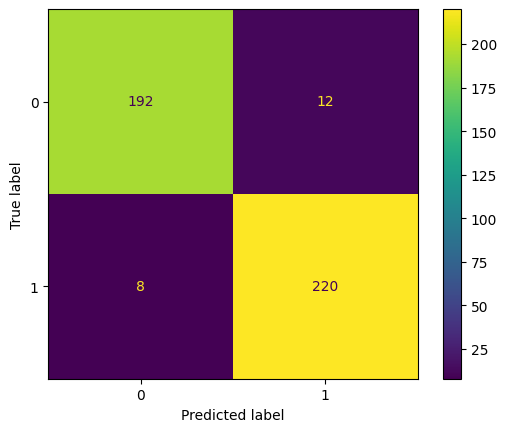

In [47]:
plot_confusion_matrix(dt, x_test_m3, y_test_m3)
plt.show() 

In [48]:
results.append(('DecisionTreeClassifier monk-3 train', accuracy_score(y_train_m3, train_pred_dt)))
results.append(('DecisionTreeClassifier monk-3 validation', dt_cv_m3.best_score_))
results.append(('DecisionTreeClassifier monk-3 test', accuracy_score(y_test_m3, test_pred_dt)))

# Summary

In [49]:
for i in range(len(results)):
  print(results[i])

('DecisionTreeClassifier monk-1 train', 0.967741935483871)
('DecisionTreeClassifier monk-1 validation', 0.8949999999999999)
('DecisionTreeClassifier monk-1 test', 0.8981481481481481)
('DecisionTreeClassifier monk-2 train', 0.9940828402366864)
('DecisionTreeClassifier monk-2 validation', 0.6873440285204991)
('DecisionTreeClassifier monk-2 test', 0.8634259259259259)
('DecisionTreeClassifier monk-3 train', 0.9590163934426229)
('DecisionTreeClassifier monk-3 validation', 0.9426666666666665)
('DecisionTreeClassifier monk-3 test', 0.9537037037037037)
